In [10]:
########################import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

#Load Dataset

df_vaccination = pd.read_csv('country_vaccinations.csv')

#data is from kaggle : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

#Display first 5 rows

df_vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.00,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [11]:
##############data preprocessing
df_vaccination.info()
#Find the number or rows and columns

df_vaccination.shape

#There are 76095 rows and 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [26]:
#####exploratory data anaysis(EDA)
df_vaccination.nunique()

country                                  223
iso_code                                 223
date                                     483
total_vaccinations                     42828
people_vaccinated                      40194
people_fully_vaccinated                37425
daily_vaccinations_raw                 27692
daily_vaccinations                     40516
total_vaccinations_per_hundred         17881
people_vaccinated_per_hundred           9078
people_fully_vaccinated_per_hundred     8772
daily_vaccinations_per_million         12405
vaccines                                  84
source_name                               81
source_website                           119
dtype: int64

In [27]:
df_vaccination.dtypes # take a look of the data types that we dealing with; precisely the date column


country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [28]:
df_vaccination['date'] = pd.to_datetime(df_vaccination['date'], format="%Y-%m-%d")
# to_datetime is a pandas method which helps to convert datetime string into pandas datetime object to make it easy when works with TimseSeries data

In [30]:
df_vaccination.dtypes # check our new data types after converting date(column) into datetime64[ns] by using pd.to_datetime()

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [12]:
df_vaccination.isnull().sum()

#There are no empty rows for country, iso_code or date columns.

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [13]:
# General Overview of the calculations in data

df_vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,"43,607.00","41,294.00","38,802.00","35,362.00","86,213.00","43,607.00","41,294.00","38,802.00","86,213.00"
mean,"45,929,644.64","17,705,077.79","14,138,299.85","270,599.58","131,305.49",80.19,40.93,35.52,"3,257.05"
std,"224,600,360.18","70,787,311.50","57,139,201.72","1,212,426.60","768,238.77",67.91,29.29,28.38,"3,934.31"
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"526,410.00","349,464.25","243,962.25","4,668.00",900.00,16.05,11.37,7.02,636.00
50%,"3,590,096.00","2,187,310.50","1,722,140.50","25,309.00","7,343.00",67.52,41.44,31.75,"2,050.00"
75%,"17,012,303.50","9,152,519.75","7,559,869.50","123,492.50","44,098.00",132.74,67.91,62.08,"4,682.00"
max,"3,263,129,000.00","1,275,541,000.00","1,240,777,000.00","24,741,000.00","22,424,286.00",345.37,124.76,122.37,"117,497.00"


In [14]:
#drop the source_name,source_website and vaccine columns

df_vaccine_country = df_vaccination.drop(['source_name','source_website','vaccines'],axis=1)
df_vaccine_country.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.00,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,"1,367.00",NaN,NaN,NaN,34.00


In [15]:
# convert Date column to date type and fill na values with 0 for calculation

df_vaccine_country["date"] = pd.to_datetime(df_vaccine_country["date"], format = '%Y-%m-%d')

df_vaccine_country = df_vaccine_country.replace([np.inf, -np.inf], np.nan)
df_vaccine_country = df_vaccine_country.fillna(0)
df_vaccine_country.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64

In [16]:
#Function to find total, avergae, maximum  and minimum of different vaccinations status by country
#STATISTICAL ANALYSIS
def vaccination_country(col_name,func_name):

    '''
    Function that requires vaccination column name, and sum/mean/max/min function name as string arguments.
    '''
    if func_name == 'sum':

        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .sum()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                            )

    elif func_name == 'mean':

        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .mean()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )
    elif func_name == 'max':

        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .max()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )
    elif func_name == 'min':

        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .min()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )

In [17]:
# Calculating different vaccinations for visualizations
max_total_vaccinations = vaccination_country('total_vaccinations','max')

sum_people_vaccinated = vaccination_country('people_vaccinated','sum')
sum_people_fully_vaccinated = vaccination_country('people_fully_vaccinated','sum')

avg_total_vaccinations = vaccination_country('total_vaccinations_per_hundred','mean')
avg_people_vaccinated = vaccination_country('people_vaccinated_per_hundred','mean')
avg_people_fully_vaccinated = vaccination_country('people_fully_vaccinated_per_hundred','mean')
avg_daily_vaccinations = vaccination_country('daily_vaccinations_per_million','mean')


In [18]:
#Function for Country with maximum and minimum daily vaccinations
def daily_vaccination_country(col_name,func_name):

    '''
    A function that requires daily_vaccination column and max/min function name as string arguments.
    '''

    daily_vaccination = (df_vaccine_country
                                 .pivot_table(index='country',columns='date',values=col_name)
                                    )
    if func_name == 'max':

        daily_vaccination['Highest Daily Vaccination'] = daily_vaccination.max(axis=1)
        daily_vaccination['Date - Highest Daily Vaccination'] = daily_vaccination.idxmax(axis=1)
        daily_vaccination.sort_values(by='Highest Daily Vaccination',ascending=False,inplace=True)
        daily_vaccination.rename_axis('',axis=1,inplace=True)

        return daily_vaccination[['Highest Daily Vaccination','Date - Highest Daily Vaccination']].reset_index()

    elif func_name == 'min':

        daily_vaccination.replace(0.00,np.nan,inplace=True)
        daily_vaccination['Lowest Daily Vaccination'] = daily_vaccination.min(axis=1)
        daily_vaccination['Date - Lowest Daily Vaccination'] = daily_vaccination.idxmin(axis=1)
        daily_vaccination.sort_values(by='Lowest Daily Vaccination',ascending=False,inplace=True)
        daily_vaccination.rename_axis('',axis=1,inplace=True)

        return daily_vaccination[['Lowest Daily Vaccination','Date - Lowest Daily Vaccination']].reset_index()


In [19]:
#Calculating highest and lowest daily vaccination and the respective dates.
highest_daily_vaccination = daily_vaccination_country('daily_vaccinations','max')
lowest_daily_vaccination = daily_vaccination_country('daily_vaccinations','min')

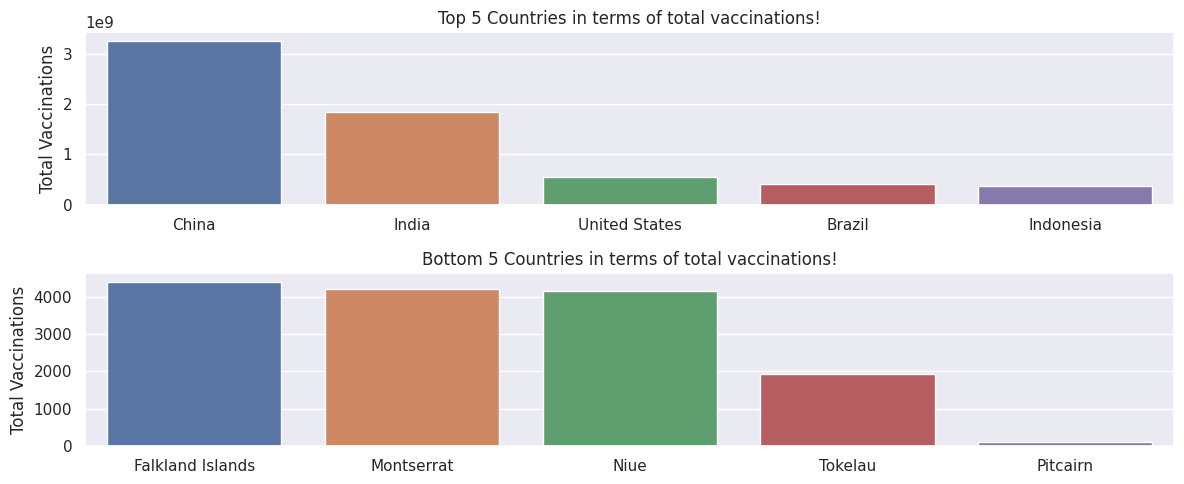

In [20]:
#Set sns theme and default figsize for all the sns visualizations.
###################VISUALISATION#############
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize' : (12,5)})

fig, axes  = plt.subplots(2,1)

sns.barplot(x='country',y='total_vaccinations',data=max_total_vaccinations.head(),ax=axes[0])
axes[0].set(xlabel = '', ylabel = 'Total Vaccinations', title ='Top 5 Countries in terms of total vaccinations!')

sns.barplot(x='country',y='total_vaccinations',data=max_total_vaccinations.tail(),ax=axes[1])
axes[1].set(xlabel = '', ylabel = 'Total Vaccinations', title ='Bottom 5 Countries in terms of total vaccinations!')


fig.tight_layout()
plt.show()

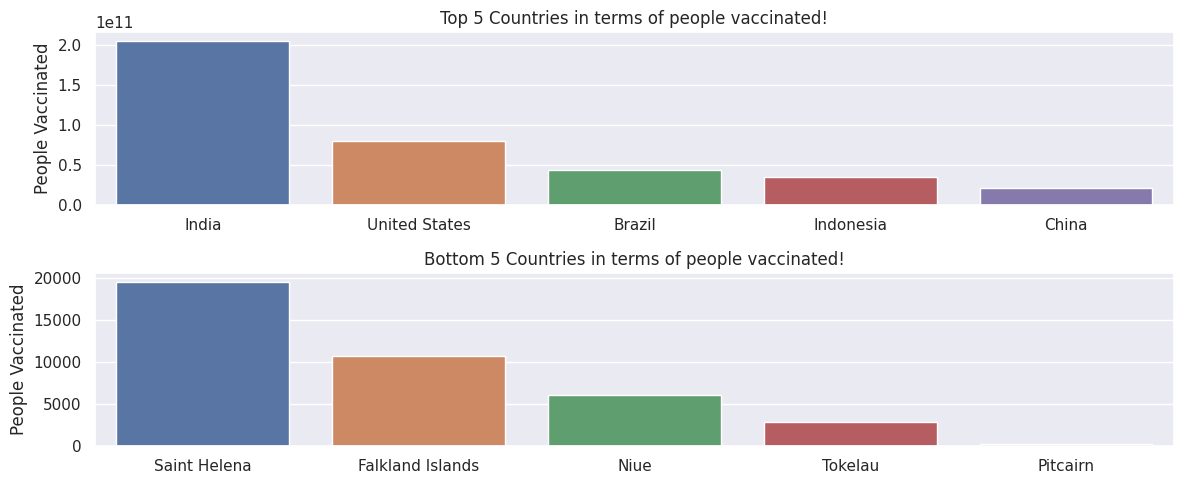

In [21]:
fig, axes = plt.subplots(2,1)

sns.barplot(x='country',y='people_vaccinated',data=sum_people_vaccinated.head(),ax=axes[0])
axes[0].set(xlabel = '', ylabel = 'People Vaccinated', title ='Top 5 Countries in terms of people vaccinated!')

sns.barplot(x='country', y='people_vaccinated',data=sum_people_vaccinated.tail(),ax=axes[1])
axes[1].set(xlabel = '', ylabel = 'People Vaccinated', title ='Bottom 5 Countries in terms of people vaccinated!')


fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


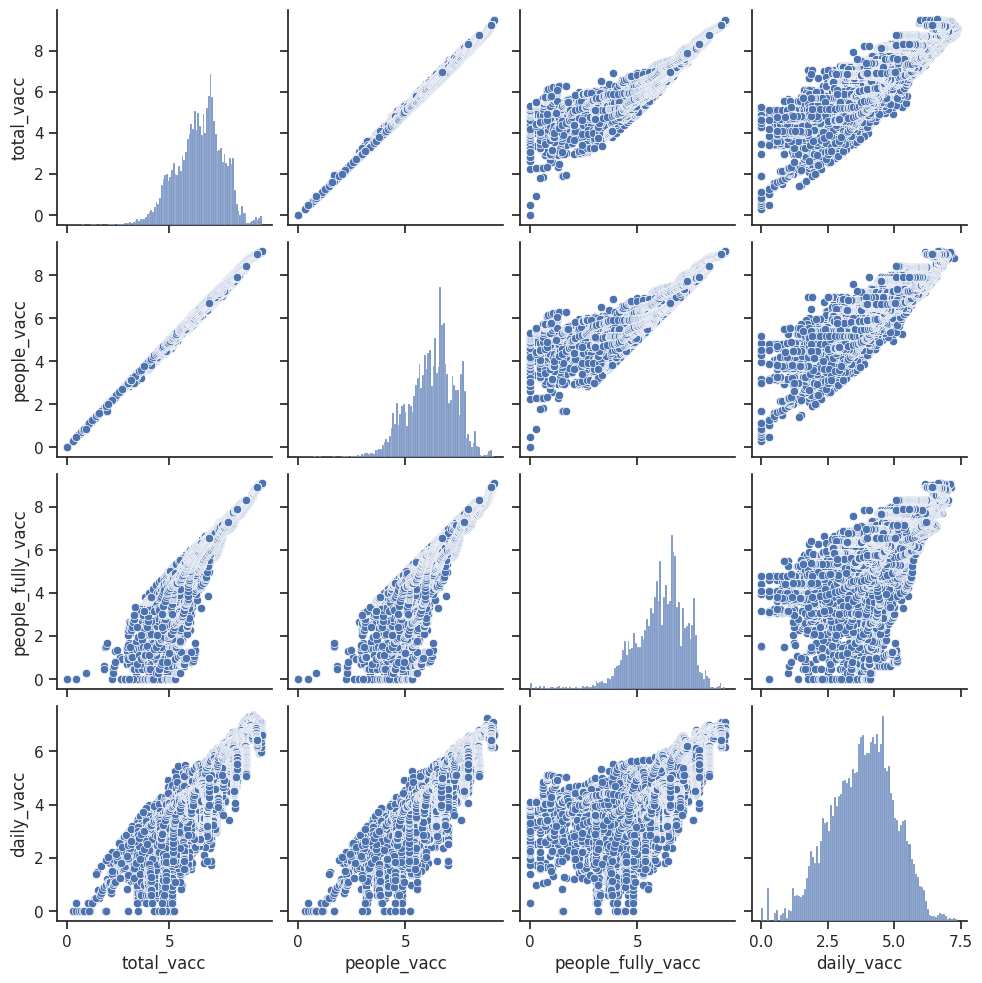

In [31]:
#Plotting scatterplot matrix using Seaborn
#create dataframe with important features.
df_vaccination['total_vacc'] = np.log10(df_vaccination['total_vaccinations'])
df_vaccination['people_vacc'] = np.log10(df_vaccination['people_vaccinated'])
df_vaccination['people_fully_vacc'] = np.log10(df_vaccination['people_fully_vaccinated'])
df_vaccination['daily_vacc'] = np.log10(df_vaccination['daily_vaccinations'])

#drop the original nontransformed columns
df_vaccination = df_vaccination.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = df_vaccination[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)